<a href="https://colab.research.google.com/github/aamanp/Text-mining-Project/blob/main/Aman_Aisha_Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
def load_prepare_data(path):
  """
  Función para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

# Ejercicio


En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Uno de los mayores problemas en el internet de hoy en día es la presencia de actitudes negativas hacia algunos colectivos en relación a su etnia, género, religión o ideología política. En este ejercicio trabajaremos con un conjunto de datos reales, etiquetados manualmente, procedentes de la plataforma [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Originalmente, a cada documento del dataset se le asignó una de las siguientes categorías:
- *religion*
- *age*
- *ethnicity*
- *gender*
- *other_cyberbullying*
- *not_cyberbullying*


El objetivo inicial del dataset era su uso para entrenar un modelo capaz de detectar el tipo de contenido de odio presente en internet según el colectivo al que se atacaba. En este caso, para simplificar el ejercicio, se ha generado una función `load_prepare_data()` que cambia las categorías del dataset obteníendose al final 2 categorías con valor 1 o 0, indicando si el tweet tiene contenido de odio

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. Será necesario incorporar características adicionales como el sentimiento o características léxicas.

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


**Nota 1**: El ejercicio propuesto es similar a los ejercicios de clasificación visto en clase, por lo que es importante que documentéis y expliquéis adecuadamente (con vuestras palabras) los procesos llevados a cabo en el ejercicio. No hacerlo puede llegar a penalizar hasta 1 punto en la calificación final.

**Nota 2**: Cualquier cálculo adicional a los vistos en clase (visualizaciones, nuevas características añadidas al modelo...) será valorado positivamente en la calificación.

## 0. Imports


In [ ]:
import pandas as pd

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `load_prepare_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [ ]:
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
# Path de datos alternativos en caso de que el anterior no funcione (al estar alojado en github puede haber limitaciones
# en la descarga.
# path_data = "https://zenodo.org/records/10938455/files/cyberbullying_tweets.csv?download=1"
dataset = load_prepare_data(path_data)

In [ ]:
dataset.head(4)

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0


In [ ]:
dataset["tweet_text"][60]
#len(dataset["tweet_text"][60])

'@nader_haq @MadDr11 Yeap, breeding and violence are the only thing they do well.'

In [ ]:
dataset["tweet_text"][60], dataset["cyberbullying"][60]


('@nader_haq @MadDr11 Yeap, breeding and violence are the only thing they do well.',
 0)

## 2. Análisis exploratorio

Número documentos que compone el dataset es el siguiente:

In [ ]:
len(dataset)

47692

La longitud de los Tweets va desde 1 hasta 4282:

In [ ]:
lista_long = []
for i in range(len(dataset)):
  lista_long.append(len(dataset["tweet_text"][i].replace(" ","")))

In [ ]:
min(lista_long)

1

In [ ]:
max(lista_long)

4282

Estos previsiblemente pertenecen a outliers. Vamos a eliminar todo tweet con un a longitud mayor de 280 carácteres.

In [ ]:
# Caracteristica adicional: longitud de caracteres

dataset["longitud_palabra"] =dataset["tweet_text"].apply(lambda x: len(x))
dataset["longitud_palabra"].describe()

count    47692.000000
mean       136.253229
std         85.226899
min          1.000000
25%         78.000000
50%        124.000000
75%        180.000000
max       5018.000000
Name: longitud_palabra, dtype: float64

In [ ]:
dataset.drop(dataset[dataset.longitud_palabra > 280].index, inplace=True)

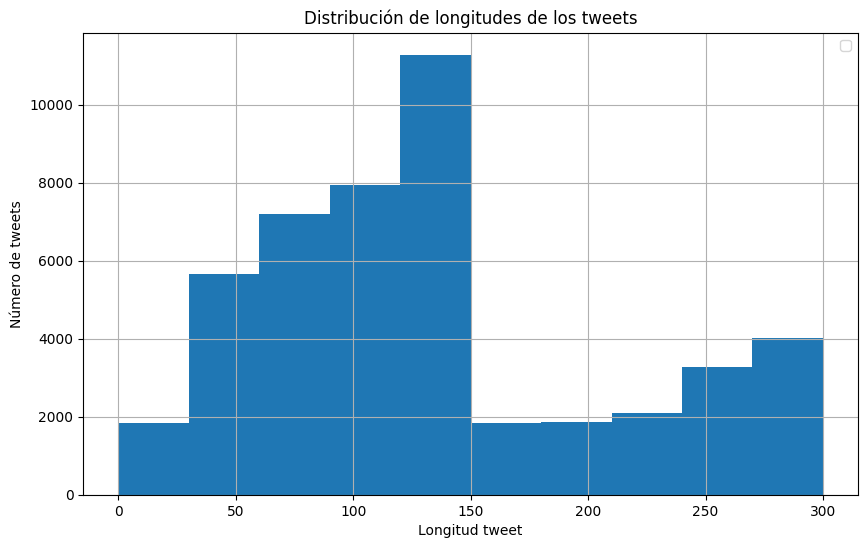

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


densidad_probabilidad, bins_centros = np.histogram(lista_long, density=True)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.hist(dataset["longitud_palabra"], range= (0,300))
plt.xlabel('Longitud tweet')
plt.ylabel('Número de tweets')
plt.title('Distribución de longitudes de los tweets')
plt.legend()
plt.grid(True)
plt.show()


cyberbullying
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: longitud_palabra, dtype: object

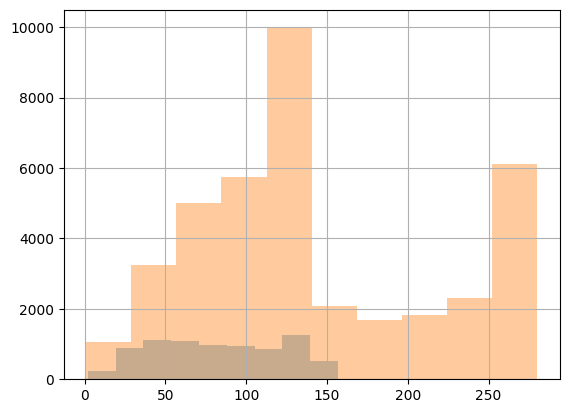

In [ ]:
dataset.groupby("cyberbullying").longitud_palabra.hist(alpha=0.4)

Observamos presencia de cyberbullying solo en tweets de longitud < 180. Se podrían haber eliminado, pero vamos a optar por modelar esto mediante la variable longitud_palabra que ya hemos creado.

In [ ]:
! pip install matplotlib wordcloud


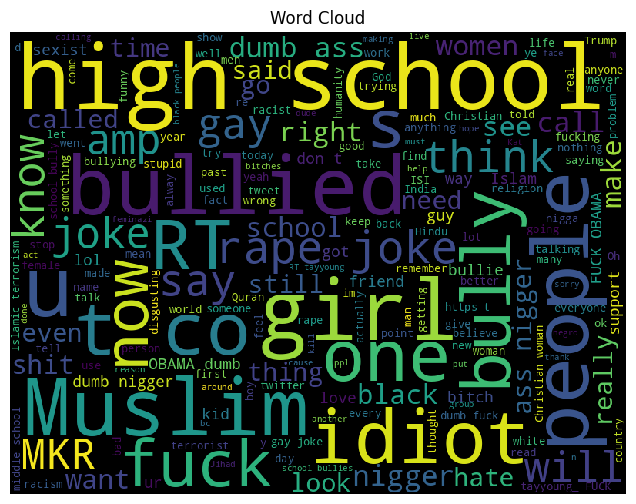

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Replace this with your text data (string or list of strings)
#text = "This is a sample text about natural language processing.
wordcloud = WordCloud(background_color="black", width=800, height=600).generate(" ".join(dataset["tweet_text"].tolist()))
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.title("Word Cloud")
plt.show()


In [ ]:
dataset["cyberbullying"].value_counts()

cyberbullying
1    39046
0     7942
Name: count, dtype: int64

## 3. Preprocesado y Normalización

In [ ]:
dataset

,tweet_text,cyberbullying,longitud_palabra
0,"In other words #katandandre, your food was cra...",0,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103
4,@RudhoeEnglish This is an ISIS account pretend...,0,103
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1,234
47688,Turner did not withhold his disappointment. Tu...,1,276
47689,I swear to God. This dumb nigger bitch. I have...,1,104
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1,90


In [ ]:
import spacy
nlp= spacy.load("en_core_web_sm")


In [ ]:
# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

In [ ]:
import sys
!{sys.executable} -m pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
import contractions
from tqdm.autonotebook import tqdm
tqdm.pandas()

dataset["normalized"] = dataset["tweet_text"].progress_apply(lambda x: eliminar_espacios(x))
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: texto_to_lower(x))

dataset.head()

<ipython-input-22-af226afb3c89>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/46988 [00:00<?, ?it/s]

  0%|          | 0/46988 [00:00<?, ?it/s]

,tweet_text,cyberbullying,longitud_palabra,normalized
0,"In other words #katandandre, your food was cra...",0,61,"in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60,@xochitlsuckkks a classy whore? or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103,"@jason_gio meh. :p thanks for the heads up, bu..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,103,@rudhoeenglish this is an isis account pretend...


In [ ]:
# Reemplazar contractions usando la librería "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    return contractions.fix(text, slang=True)

dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: replace_contraction(x))

  0%|          | 0/46988 [00:00<?, ?it/s]

In [ ]:
# Tokenizador
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

def normalizar_tokens(documento):
    # Dividir el documento en palabras
    palabras =  tweet_tokenizer.tokenize(documento) # tokenize(documento)

    # Reemplazar URLs, menciones de Twitter y números por los tokens correspondientes
    for i in range(len(palabras)):
        if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith("www."):
            palabras[i] = "URL"
        elif palabras[i].startswith("@"): #startswith "@"
            palabras[i] = "MENTION"
        elif palabras[i].isdigit(): # .isdigit()
            palabras[i] = "NUM"

    # Unir las palabras de nuevo en un documento modificado
    documento_modificado = ' '.join(palabras)

    return documento_modificado

In [ ]:
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: normalizar_tokens(x))
dataset.head()

  0%|          | 0/46988 [00:00<?, ?it/s]

,tweet_text,cyberbullying,longitud_palabra,normalized
0,"In other words #katandandre, your food was cra...",0,61,"in other words #katandandre , your food was cr..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115,why is #aussietv so white ? #mkr #theblock #im...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60,MENTION a classy whore ? or more red velvet cu...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103,"MENTION meh . :p thanks for the heads up , but..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,103,MENTION this is an isis account pretending to ...


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

def lematizar_eliminacion_tokens(texto):
    # Procesar el texto con el objeto nlp
    doc = nlp(texto)

    # Lematizar el texto
    lemas = [token.lemma_ for token in doc]

    # Eliminar símbolos de puntuación y stopwords
    tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in en_stopwords]

    # Unir los tokens filtrados en un nuevo texto
    texto_procesado = ' '.join(tokens_filtrados)

    return texto_procesado

dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: lematizar_eliminacion_tokens(x))
dataset.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  0%|          | 0/46988 [00:00<?, ?it/s]

,tweet_text,cyberbullying,longitud_palabra,normalized
0,"In other words #katandandre, your food was cra...",0,61,word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60,MENTION classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103,MENTION meh thank head concerned another angry...
4,@RudhoeEnglish This is an ISIS account pretend...,0,103,MENTION isis account pretend kurdish account l...


In [ ]:
def token_appearance(document, token = "MENTION"):
  return len([x for x in document.split() if x == token])

dataset["num_mention"] = dataset["normalized"].progress_apply(lambda x: token_appearance(x, token="MENTION"))
dataset["num_URLS"] = dataset["normalized"].progress_apply(lambda x: token_appearance(x, token="URL"))
dataset["num_NUM"] = dataset["normalized"].progress_apply(lambda x: token_appearance(x, token="NUM"))

  0%|          | 0/46988 [00:00<?, ?it/s]

  0%|          | 0/46988 [00:00<?, ?it/s]

  0%|          | 0/46988 [00:00<?, ?it/s]

Por último, utilizamos la librería vader para añadir una característica adicional, la polariad negativa asociada al tweet.

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentiText,SentimentIntensityAnalyzer #https://github.com/cjhutto/vaderSentiment
sentsss=SentimentIntensityAnalyzer()
sentsss

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def sentimiento_negativo(tweet):
  return sentsss.polarity_scores(tweet)["neg"]

dataset["negatividad"]= dataset["normalized"].apply(lambda x: sentimiento_negativo(x))
dataset.head()

,tweet_text,cyberbullying,longitud_palabra,normalized,num_mention,num_URLS,num_NUM,negatividad
0,"In other words #katandandre, your food was cra...",0,61,word katandandre food crapilicious mkr,0,0,0,0.000
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115,aussietv white mkr theblock imacelebrityau tod...,0,0,0,0.000
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60,MENTION classy whore red velvet cupcake,1,0,0,0.384
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103,MENTION meh thank head concerned another angry...,1,0,0,0.351
4,@RudhoeEnglish This is an ISIS account pretend...,0,103,MENTION isis account pretend kurdish account l...,1,0,0,0.128


## 4. Vectorización

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizador = TfidfVectorizer(lowercase=False,
                               ngram_range=(1,3),
                               min_df=0.005)

vector_data = vectorizador.fit_transform(dataset["normalized"])


In [ ]:
vector_data

<46988x402 sparse matrix of type '<class 'numpy.float64'>'
	with 378276 stored elements in Compressed Sparse Row format>

In [ ]:
extra_features = dataset[['num_mention','num_URLS','num_NUM','longitud_palabra', "negatividad"]]
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y = dataset["cyberbullying"].values.astype(np.float32)
# Unimos las características TFIDF con las características previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')
X

<46988x407 sparse matrix of type '<class 'numpy.float64'>'
	with 484259 stored elements in Compressed Sparse Row format>

## 5. Entrenamiento y evaluación de modelos


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    random_state=0,
                                                    stratify = y)
print(X_train.shape)
print(X_test.shape)

(35241, 407)
(11747, 407)


In [ ]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un StratifiedKFold
          KF = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Vamos a empezar probando 4 modelos: LogisticRegression, NaiveBayes, DecisionTree y RandomForest.

In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic", LogisticRegression()),
         ("GaussianNB", GaussianNB()),
          ("DecisionTree", DecisionTreeClassifier()),
          ("RandomForest", RandomForestClassifier())
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X_train.toarray(), y_train)

Metric: accuracy , KFold 
Logistic: 0.849522 (0.002634) 
Metric: accuracy , KFold 
GaussianNB: 0.668880 (0.008396) 
Metric: accuracy , KFold 
DecisionTree: 0.821344 (0.002853) 
Metric: accuracy , KFold 
RandomForest: 0.847621 (0.002131) 


([array([0.8545893 , 0.84733258, 0.84846765, 0.84775823, 0.84946084]),
  array([0.67130089, 0.67437571, 0.65664018, 0.66217367, 0.67990919]),
  array([0.82266988, 0.82321226, 0.8156924 , 0.82307037, 0.82207719]),
  array([0.84848915, 0.85116345, 0.84477866, 0.84704881, 0.84662316])],
 ['Logistic', 'GaussianNB', 'DecisionTree', 'RandomForest'])

Vamos a probar en mayor detalle LogisticRegression y RandomForest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.853182 usando los parámetros {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
model = RandomForestClassifier()
n_estimators = [50,100,150]
max_depth = [23]
min_samples_leaf = [5,10]
max_features = [5,10,15]

grid = dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_leaf=min_samples_leaf, max_features = max_features )
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.856587 usando los parámetros {'max_depth': 23, 'max_features': 15, 'min_samples_leaf': 5, 'n_estimators': 50}


In [ ]:
model = LogisticRegression(C=1, penalty= 'l2', solver= 'newton-cg')
model.fit(X_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

In [ ]:
y_predict= model.predict(X_test)
print(y_predict)

[1. 0. 1. ... 1. 1. 1.]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[ 768 1218]
 [ 409 9352]]
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49      1986
         1.0       0.88      0.96      0.92      9761

    accuracy                           0.86     11747
   macro avg       0.77      0.67      0.70     11747
weighted avg       0.85      0.86      0.85     11747



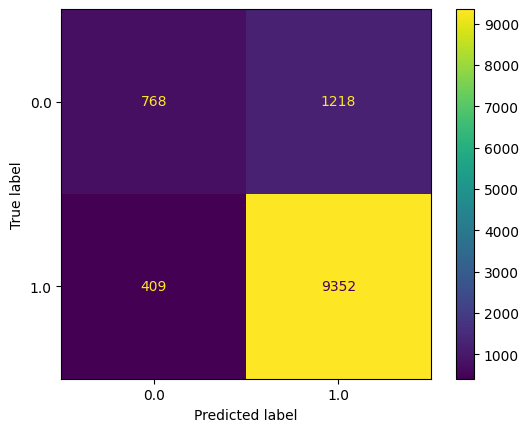

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

De estos resultados, destacar que la clase minoritaría (0, no cyberbullying) es la que más le cuesta al modelo de clasificar correctamente, con un recall de 0.4. No se ha llegado a explorar en este ejercicio, pero en el futuro se podría probar a utilizar diversas técnicas para balancear los datos.